<a href="https://colab.research.google.com/github/OlivierNDO/image_proc/blob/master/RoomPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load Packages

In [2]:
import datetime
import skimage
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle as pkl
from operator import itemgetter
import os
import random
from skimage import io
from skimage.transform import resize
from sklearn.metrics import precision_score, recall_score, confusion_matrix, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.layers import Add, ZeroPadding2D, AveragePooling2D, GaussianNoise, SeparableConv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import time
from tqdm import tqdm, tqdm_notebook
from functools import partial
from PIL import ImageStat, Image
import os
import logging
from google.cloud import storage
import cv2
from io import BytesIO

In [3]:
# Define RoomPrediction Class

In [4]:
class RoomPrediction:
    """
    Predict room probabilities from image url or local file path
    Args:
        img : either url or file path to local machine
        img_type: {'url' or 'file'} depending on <img> attribute
        pred_type: type of prediction output {'numeric' or 'display'}
        img_height: height of images used in model training
        img_width: width of images used in model training
        model_object: loaded Keras model
    """
    def __init__(self,
                 img,
                 model_object,
                 img_type = 'url',
                 pred_type = 'numeric',
                 img_height = 220,
                 img_width = 220):
        self.img = img
        self.img_type = img_type
        self.pred_type = pred_type
        self.img_height = img_height
        self.img_width = img_width
        self.model_object = model_object
        self.class_list = ['Bathroom', 'Bedroom', 'Diningroom', 'Kitchen', 'Livingroom']
        

    def read_resize_image(self):
        """Read image (url or file path) and resize"""
        if self.img_type == 'url':
            img_load = Image.open(BytesIO(requests.get(self.img).content))
        elif self.img_type == 'file':
            img_load = tf.keras.preprocessing.image.load_img(self.img)
        else:
            print('Error: Attribute img_type must be "url" or "file"')
        
        resized_img = skimage.transform.resize(np.array(img_load),  (self.img_height, self.img_width))
        return np.expand_dims(np.array(resized_img), axis = 0)
        
    def predict_rooms(self):
         input_image = self.read_resize_image()
         pred_list = list(self.model_object.predict(input_image)[0])
         if self.pred_type == 'display':
             pred_dict = dict(zip(['Bathroom', 'Bedroom', 'Diningroom', 'Kitchen', 'Livingroom'],
                                  [str(round(p * 100,3)) + "%" for p in pred_list]))
         else:
             pred_dict = dict(zip(['Bathroom', 'Bedroom', 'Diningroom', 'Kitchen', 'Livingroom'],
                                  pred_list))
         return pred_dict
     
    def pred_plot_rooms(self):
        input_image = self.read_resize_image()
        pred_list = self.predict_rooms()
        pred_str = '\n'.join([' : '.join(x) for x in pred_list.items()])
        plt.imshow(input_image[0])
        plt.title(pred_str)

In [5]:
# Make Prediction

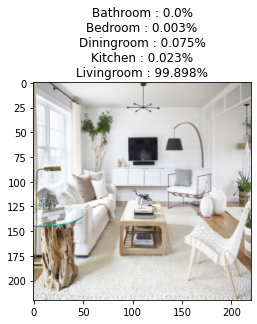

In [6]:
room_classifier = tf.keras.models.load_model('cloud_scene_img_model_sgd_lrs_20191007_0313.hdf5')
input_image = 'living_room_image.jpg'
room_predicter = RoomPrediction(model_object = room_classifier, img = input_image, img_type = 'file', pred_type = 'display')
room_predicter.pred_plot_rooms()
plt.show()